# INTRODUCTION

The aim of this report is to conduct some classification techniques on the data. The classification techniques are a type of machine learning techniques that is used for prediction. Machine learning consist of two main techniques that is 
   1. Supervised machine learning technique: It is a machine learning task of learning a function that maps an input to an output. Here, the algorithm is used to train the data to be able to make some predictions. It can be used grouped into two:
   
        i) Regression- uses a real output values such as numbers, weights etc.
        
        ii) Classification – uses categorical output variables such as yes and no.

2. Unsupervised machine learning technique: Here, there is no input data and no corresponding output variables. Data training is not carried out when building the models. It can be categorized into:
        i) Clustering: It focuses in discovering the inherent groupings in the data. For examples when trying to group customers according to their purchasing behaviors
        ii) Association: Here, we discover rules that describe a large portion of data. For example we can predict that the married men tend to save a lot compared to the single etc. 
Classification technique belongs to the supervised machine learning technique. Here we will try to classify the iris data into its different classes. Two classification  techniques will be used to try and classify the iris data into its respective classes. 


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


### Data
The iris data has been obtained from the Fisher’s Iris data base. The data contains 3 classes with 50 rows each. The classes refers to the type of plants. 
The data contains 5 variables and 150 observation. The five variables are:

##### 1). sepal length in cm 
##### 2). sepal width in cm 
##### 3). petal length in cm 
##### 4). petal width in cm 
##### 5). class: 
- Iris Setosa 
- Iris Versicolour 
- Iris Virginica 


In [2]:
iris = pd.read_excel("Iris data.xlsx")

In [3]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# determining the dimension of the data (number of instances)
print("The dimension of the iris data",iris.shape)


The dimension of the iris data (150, 5)


In [6]:
# count of classes
print (iris['class'].value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64


In [7]:
# data types
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 sepal length    150 non-null float64
sepal width      150 non-null float64
petal length     150 non-null float64
petal width      150 non-null float64
class            150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Methods
The two classification techniques that will be used to classify the iris data are:
1.	Decision Tree: A decision tree is a classification technique that is used to visualize and represents the decision explicitly. It uses a tree-like model of decision. Through the tree, one can make some decision.
2.	KNN algorithm: Is a type of classification technique that classify data sets based on similarity measures, i.e. the distance function. It uses neighbours to determine the value of k. The data is assigned to the class, which has the nearest neighbours. The accuracy of the model might increases as you increase the number of k since the data will much be classified to its nearest neighbours.  


# Data Exploration

In [9]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


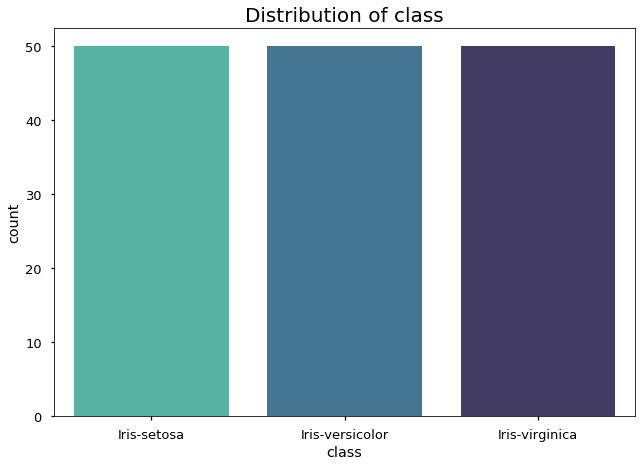

In [13]:

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(iris['class'], palette = 'mako_r')
plt.title('Distribution of class', fontsize = 20)

plt.show()


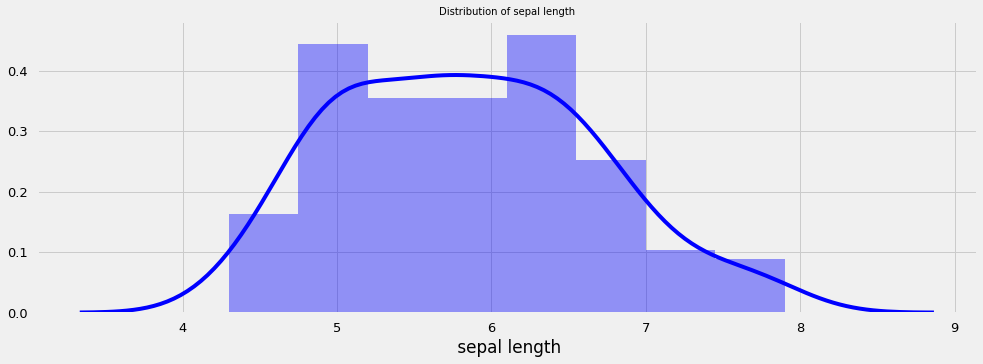

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(iris.iloc[:,0], color = 'blue')
plt.title('Distribution of sepal length', fontsize = 10)
plt.show()

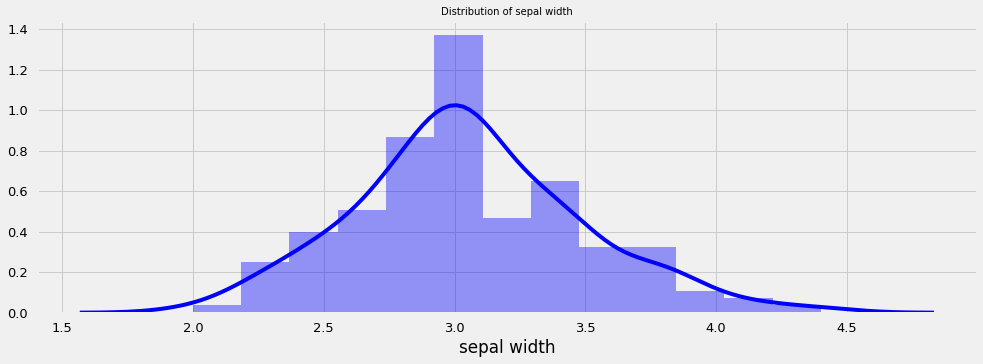

In [45]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(iris.iloc[:,1], color = 'blue')
plt.title('Distribution of sepal width', fontsize = 10)
plt.show()

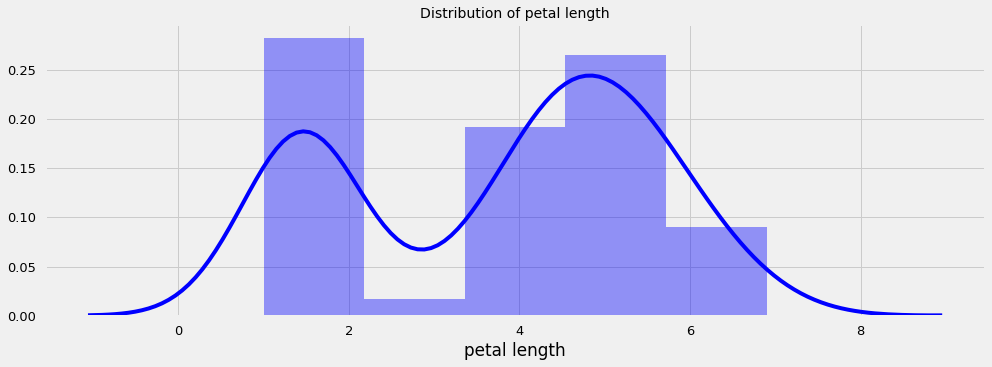

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(iris.iloc[:,2], color = 'blue')
plt.title('Distribution of petal length', fontsize = 14)
plt.show()

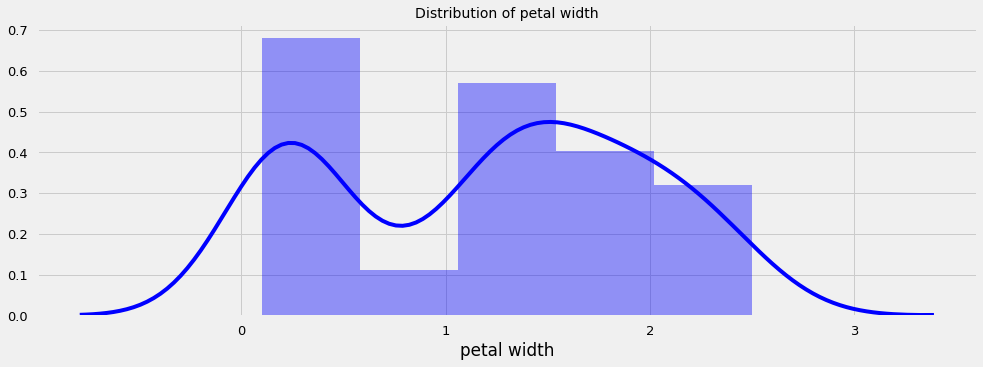

In [50]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(iris.iloc[:,3], color = 'blue')
plt.title('Distribution of petal width', fontsize = 14)
plt.show()

## Data Preprocessing 

In [14]:
# checking for missing values
iris.isna().sum()

 sepal length    0
sepal width      0
petal length     0
petal width      0
class            0
dtype: int64

### Modelling
Before the two classification techniques were employed, the data was portioned into training and testing. The training data was given 80 % sampled while the testing data was provided tested 20 %. The portioned data was portioned using a random sample to make the modelling consistent. This makes sure that the two classification models have the correct output that is required for data prediction. A package known as ‘train_test_split’ is used for partitioning the data into training and testing. The decision tree was modelled using DecisionTreeClassifier from the sklearn package.
Similarly, the KNN logarithms used a package from the sklearn known as KNeighborsClassifier. These two packages can create both the decision tree and the KNN algorithm. The package ‘accuracy_score’ is used to determine the accuracy level for both the trained and tested data for both the two classification models. The package ‘confusion_matrix’ is used to create a confusion matrix of the predicted data. It classifies how the model accurately classified the predicted data. The confusion matrix goes hand in hand with the accuracy score. 


### Training the data

In [25]:
X=iris.iloc[:, 0:4]
Y=iris['class']
# partioning the training set to 80 % and testing to 20 %
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


# RESULTS

## Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(X_train,Y_train)
# Creating a prediction
Y_pred = model.predict(X_test)
# Accuracy of the model
Acc=metrics.accuracy_score(Y_test, Y_pred)*100
print ("Decision Tree Accuracy :", Acc.round(2), "%")
#confusion matrix, f1, recall, support and precision

Conf = confusion_matrix(Y_test, Y_pred)
print ("Confusion Matrix of the Decision Tree\n", Conf)
print ("precision, recall, fi-score and support\n",classification_report(Y_test, Y_pred))
 

The confusion matrix was used to assess the tested data using the predicted data. It was obtained that 11 rows of iris setosa class which were on the testing data set was accurately predicted as 11. Also, 13 rows of Iris Versicolour class of the tested data was accurately predicted as 13. Lastly, 6 rows of the Iris Virginica class which were on the testing data was predicted correctly as 6 rows of Iris Virginica. This made the accuracy level of the model to be 100 %. 

## KNN algorithmn 

In [36]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, Y_train)
KNN_prediction = KNN_model.predict(X_test)
conMatrix = confusion_matrix(Y_test, Y_pred)
KnnAcc =accuracy_score(KNN_prediction, Y_test)*100
print("KNN accuracy score: ",KnnAcc.round(2), "%")
print("Confusion matrix\n",conMatrix)
print(classification_report(KNN_prediction, Y_test))

KNN accuracy score:  96.67 %
Confusion matrix
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



Similarly from the KNN algorithm, It was obtained that 11 rows of iris setosa class which were on the testing data set was accurately predicted as 11. Also, 13 rows of Iris Versicolour class of the tested data was accurately predicted as 13. Lastly, 6 rows of the Iris Virginica class which were on the testing data was predicted correctly as 6 rows of Iris Virginica. However, the accuracy level was obtained to be 96.67%. 

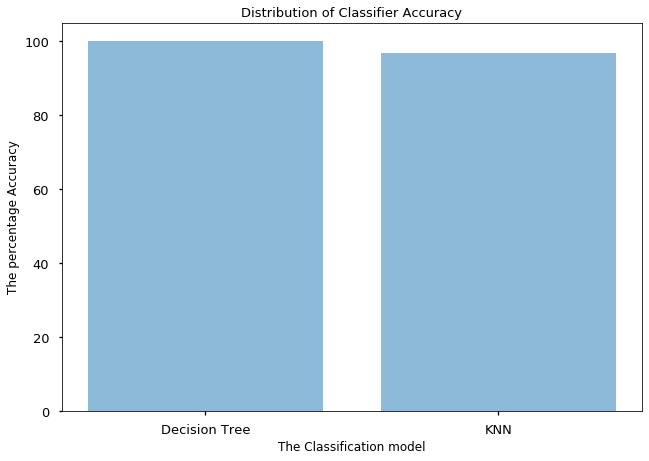

In [39]:
objects = ('Decision Tree', 'KNN')
y_pos = np.arange(len(objects))
performance = [Acc,KnnAcc]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title("Distribution of Classifier Accuracy",fontsize=13)
plt.xlabel('The Classification model', fontsize=12)
plt.ylabel("The percentage Accuracy", fontsize=12)

plt.show()

The accuracy of the two models can be compared using a visualization. Since we are comparing two models, we will use a bar chart to compare them as shown above

## Conclusion
The two classification models have been successfully modelled using the sklearn package. The data set was first split into training and testing before creating the two models. The two models were created using the training data. The training data was predicted, and the prediction was compared with the training data to obtain the level of accuracies of the two models. The confusion matrix for the two models was also created. The result obtained showed that decision tree had 100 % accuracy level while the KNN algorithm had 96.67 % accuracy level. The 